In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

### EXAMPLE READ JSON 

In [3]:
raw_data = pd.read_csv('data/BRAZIL_EXP_COMPLETE.csv',sep=';',low_memory=False)
raw_data

,CO_ANO,CO_MES,CO_NCM,CO_UNID,CO_PAIS,SG_UF_NCM,CO_VIA,CO_URF,QT_ESTAT,KG_LIQUIDO,VL_FOB
0,1997,11,74122000,10,249,SP,4,817600,0,0,3
1,1997,11,73082000,10,97,MG,7,130151,0,4292,6442
2,1997,11,84248119,11,196,SP,1,817800,32,3468,31510
3,1997,11,48239090,10,586,MN,9,910600,0,0,1
4,1997,11,72112910,10,850,SP,1,817800,118,117505,103866
...,...,...,...,...,...,...,...,...,...,...,...
26921048,2023,7,2064900,10,193,SC,1,927800,71380,71380,37378
26921049,2023,8,84379000,10,63,RS,7,1017500,688,688,16865
26921050,2023,1,68053090,10,239,SP,1,817800,945,945,13606
26921051,2023,8,73181900,10,40,SP,4,817600,1152,1152,8962


In [4]:
(raw_data == 0).sum().sort_values(ascending=False)

QT_ESTAT      4675895
KG_LIQUIDO    2143698
CO_VIA         103736
VL_FOB          53466
CO_NCM              0
CO_ANO              0
CO_MES              0
SG_UF_NCM           0
CO_PAIS             0
CO_UNID             0
CO_URF              0
dtype: int64

In [5]:
cols = ['QT_ESTAT', 'KG_LIQUIDO', 'VL_FOB']
raw_data[cols] = raw_data[cols].replace(0, np.nan)

In [6]:
print(raw_data.isnull().sum())
print(raw_data.isna().sum())

CO_ANO              0
CO_MES              0
CO_NCM              0
CO_UNID             0
CO_PAIS             0
SG_UF_NCM           0
CO_VIA              0
CO_URF              0
QT_ESTAT      4675895
KG_LIQUIDO    2143698
VL_FOB          53466
dtype: int64
CO_ANO              0
CO_MES              0
CO_NCM              0
CO_UNID             0
CO_PAIS             0
SG_UF_NCM           0
CO_VIA              0
CO_URF              0
QT_ESTAT      4675895
KG_LIQUIDO    2143698
VL_FOB          53466
dtype: int64


In [7]:
raw_data = raw_data.dropna(subset=cols, how='all')
raw_data

,CO_ANO,CO_MES,CO_NCM,CO_UNID,CO_PAIS,SG_UF_NCM,CO_VIA,CO_URF,QT_ESTAT,KG_LIQUIDO,VL_FOB
0,1997,11,74122000,10,249,SP,4,817600,NaN,NaN,3.0
1,1997,11,73082000,10,97,MG,7,130151,NaN,4292.0,6442.0
2,1997,11,84248119,11,196,SP,1,817800,32.0,3468.0,31510.0
3,1997,11,48239090,10,586,MN,9,910600,NaN,NaN,1.0
4,1997,11,72112910,10,850,SP,1,817800,118.0,117505.0,103866.0
...,...,...,...,...,...,...,...,...,...,...,...
26921048,2023,7,2064900,10,193,SC,1,927800,71380.0,71380.0,37378.0
26921049,2023,8,84379000,10,63,RS,7,1017500,688.0,688.0,16865.0
26921050,2023,1,68053090,10,239,SP,1,817800,945.0,945.0,13606.0
26921051,2023,8,73181900,10,40,SP,4,817600,1152.0,1152.0,8962.0


In [8]:
raw_data['QT_ESTAT'].fillna(raw_data['QT_ESTAT'].median(), inplace=True)
raw_data['KG_LIQUIDO'].fillna(raw_data['KG_LIQUIDO'].median(), inplace=True)
raw_data['VL_FOB'].fillna(raw_data['VL_FOB'].median(), inplace=True)


/tmp/ipykernel_2297/3762847928.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  raw_data['QT_ESTAT'].fillna(raw_data['QT_ESTAT'].median(), inplace=True)
/tmp/ipykernel_2297/3762847928.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_data['QT_ESTAT'].fillna(raw_data['QT_ESTAT'].median(), inplace=True)
/tmp/ipykernel_2297/3762847928.py

In [9]:
raw_data.isnull().sum()

CO_ANO        0
CO_MES        0
CO_NCM        0
CO_UNID       0
CO_PAIS       0
SG_UF_NCM     0
CO_VIA        0
CO_URF        0
QT_ESTAT      0
KG_LIQUIDO    0
VL_FOB        0
dtype: int64

In [10]:
raw_data

,CO_ANO,CO_MES,CO_NCM,CO_UNID,CO_PAIS,SG_UF_NCM,CO_VIA,CO_URF,QT_ESTAT,KG_LIQUIDO,VL_FOB
0,1997,11,74122000,10,249,SP,4,817600,62.0,148.0,3.0
1,1997,11,73082000,10,97,MG,7,130151,62.0,4292.0,6442.0
2,1997,11,84248119,11,196,SP,1,817800,32.0,3468.0,31510.0
3,1997,11,48239090,10,586,MN,9,910600,62.0,148.0,1.0
4,1997,11,72112910,10,850,SP,1,817800,118.0,117505.0,103866.0
...,...,...,...,...,...,...,...,...,...,...,...
26921048,2023,7,2064900,10,193,SC,1,927800,71380.0,71380.0,37378.0
26921049,2023,8,84379000,10,63,RS,7,1017500,688.0,688.0,16865.0
26921050,2023,1,68053090,10,239,SP,1,817800,945.0,945.0,13606.0
26921051,2023,8,73181900,10,40,SP,4,817600,1152.0,1152.0,8962.0


In [12]:
raw_data_years = (raw_data.groupby(['CO_ANO', 'SG_UF_NCM'])[['QT_ESTAT', 'KG_LIQUIDO', 'VL_FOB']].sum().reset_index())
raw_data_years

,CO_ANO,SG_UF_NCM,QT_ESTAT,KG_LIQUIDO,VL_FOB
0,1997,AC,6.180000e+02,4.564610e+05,2.067540e+05
1,1997,AL,1.130103e+06,1.126231e+09,3.407308e+08
2,1997,AM,1.204974e+08,1.146168e+08,1.934217e+08
3,1997,AP,1.194472e+06,8.262984e+08,6.411702e+07
4,1997,BA,3.234290e+07,3.929499e+09,1.866466e+09
...,...,...,...,...,...
812,2023,RS,3.277958e+10,1.609305e+10,1.446851e+10
813,2023,SC,2.738572e+09,5.801903e+09,7.926238e+09
814,2023,SE,7.006083e+07,2.256863e+08,1.643309e+08
815,2023,SP,1.461635e+10,3.950650e+10,4.564409e+10


In [13]:
raw_data_years.isnull().sum()

CO_ANO        0
SG_UF_NCM     0
QT_ESTAT      0
KG_LIQUIDO    0
VL_FOB        0
dtype: int64

In [14]:
X_scaled = StandardScaler().fit_transform(raw_data_years[cols])

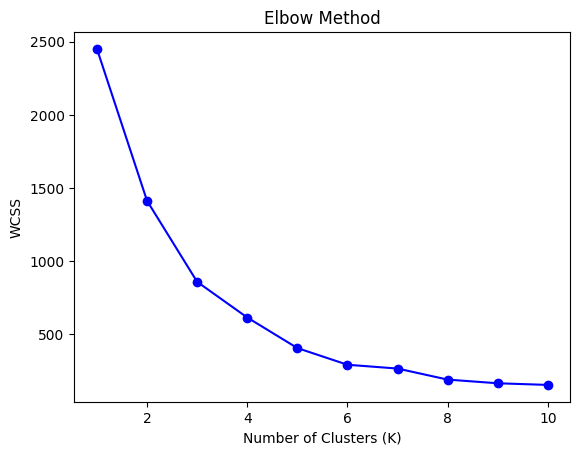

In [15]:
wcss = []  # within-cluster sum of squares
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, 'bo-')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.show()

In [19]:

kmeans = KMeans(n_clusters=8, random_state=42)
raw_data_years['provinsi_paling_banyak_belanja'] = kmeans.fit_predict(X_scaled)

raw_data_years.drop('cluster',axis=1)

,CO_ANO,SG_UF_NCM,QT_ESTAT,KG_LIQUIDO,VL_FOB,provinsi_paling_banyak_belanja
0,1997,AC,6.180000e+02,4.564610e+05,2.067540e+05,0
1,1997,AL,1.130103e+06,1.126231e+09,3.407308e+08,0
2,1997,AM,1.204974e+08,1.146168e+08,1.934217e+08,0
3,1997,AP,1.194472e+06,8.262984e+08,6.411702e+07,0
4,1997,BA,3.234290e+07,3.929499e+09,1.866466e+09,0
...,...,...,...,...,...,...
812,2023,RS,3.277958e+10,1.609305e+10,1.446851e+10,3
813,2023,SC,2.738572e+09,5.801903e+09,7.926238e+09,5
814,2023,SE,7.006083e+07,2.256863e+08,1.643309e+08,0
815,2023,SP,1.461635e+10,3.950650e+10,4.564409e+10,7


In [20]:
raw_data_years.groupby(['CO_ANO', 'provinsi_paling_banyak_belanja'])[['VL_FOB', 'KG_LIQUIDO', 'QT_ESTAT']].mean()


VL_FOB    KG_LIQUIDO  \
CO_ANO provinsi_paling_banyak_belanja                               
1997   0                               4.884312e+08  9.528582e+08   
       3                               1.808007e+10  1.571664e+10   
       5                               4.554794e+09  1.478469e+10   
       6                               4.740549e+09  6.294207e+10   
1998   0                               4.514410e+08  1.047107e+09   
...                                             ...           ...   
2023   1                               2.628707e+10  1.165340e+11   
       3                               2.070415e+10  3.661282e+10   
       5                               6.449464e+09  1.257866e+10   
       6                               1.400315e+10  1.121669e+11   
       7                               4.564409e+10  3.950650e+10   

                                           QT_ESTAT  
CO_ANO provinsi_paling_banyak_belanja                
1997   0                               9.849162e+07  
       3                               5.250054e+09  
       5                               1.442048e+09  
       6                               3.524019e+08  
1998   0                               1.245359e+08  
...                                             ...  
2023   1                               1.102548e+11  
       3                               1.814578e+10  
       5                               6.882903e+09  
       6                               1.088548e+11  
       7                               1.461635e+10  

[140 rows x 3 columns]

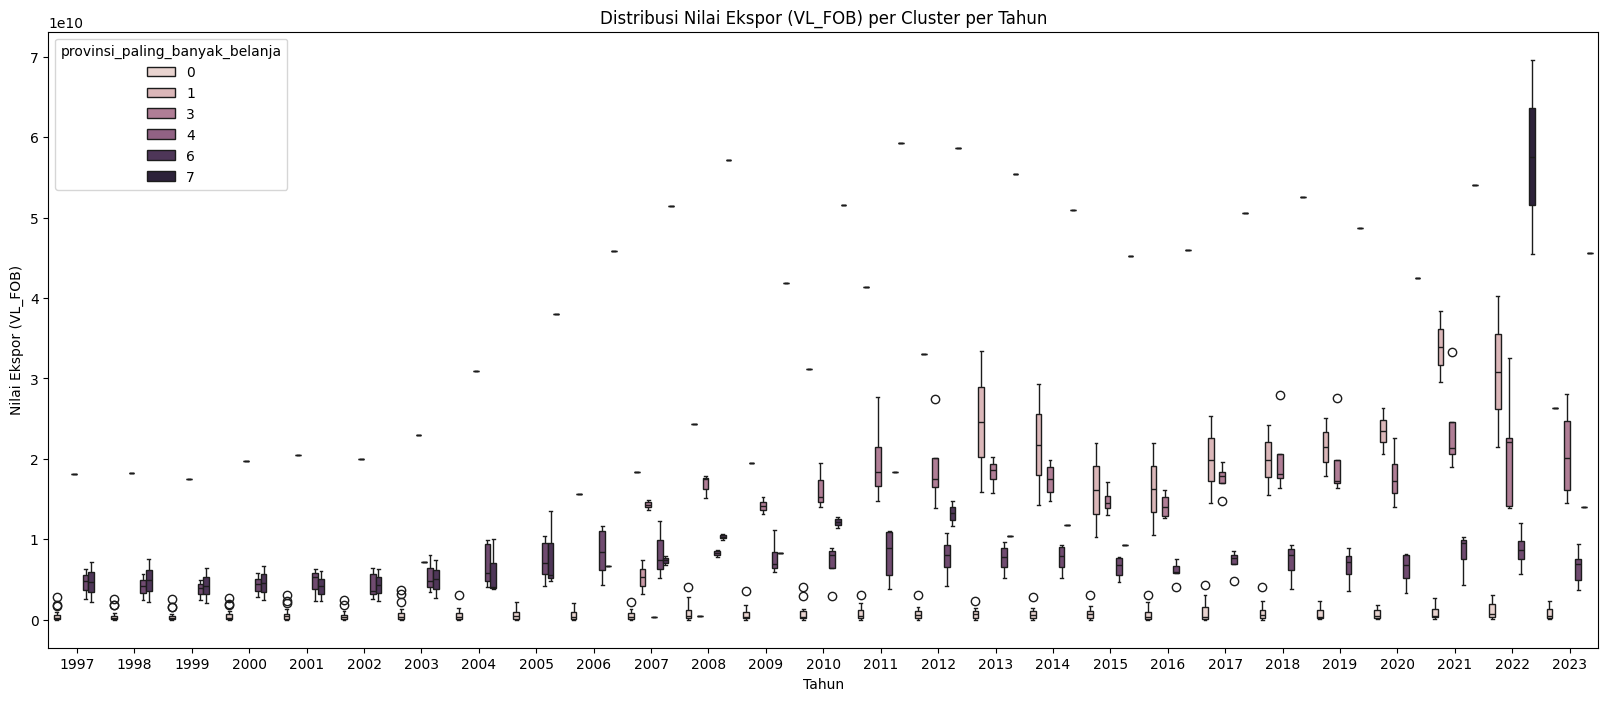

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20,8))
sns.boxplot(data=raw_data_years, x='CO_ANO', y='VL_FOB', hue='provinsi_paling_banyak_belanja')
plt.xlabel("Tahun")
plt.ylabel("Nilai Ekspor (VL_FOB)")
plt.title("Distribusi Nilai Ekspor (VL_FOB) per Cluster per Tahun")
plt.show()
